In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
def load_data():
    df_mh=pd.read_excel("rollingsales_manhattan.xls",skiprows=4)
    df_mh["AREA"]="MH"
    df_bx=pd.read_excel("rollingsales_bronx.xls",skiprows=4)
    df_bx["AREA"]="BX"
    df=pd.concat([df_mh,df_bx])

    df.columns = df.columns.str.replace(' ', '_')
    df=df.drop(columns=['EASE-MENT'])# all the values in this column is nan.
    df['not_apartment']=df['APARTMENT_NUMBER'].isna()# ture: it is not an apartment. false: it is an apartment.
    df=df.drop(columns=['APARTMENT_NUMBER','ADDRESS','BUILDING_CLASS_AT_PRESENT','SALE_DATE'])
    df=df.dropna()
    return df

In [3]:
df=load_data()
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,AREA,not_apartment
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809,MH,True
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,MH,True
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000,MH,True
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,10009.0,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0,MH,True
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,MH,True


In [4]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['SALE_PRICE']>0]
    X = df_select.drop(['SALE_PRICE'], axis=1)
    Y = df_select['SALE_PRICE']
    return X,Y

In [5]:
# select neighborhood / BLOCK + GROSS_SQUARE_FEET
features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET','SALE_PRICE']
# features_selected=['BLOCK','GROSS_SQUARE_FEET','SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
# X=pd.get_dummies(X, columns=['BLOCK'])
X.head()

,GROSS_SQUARE_FEET,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,NEIGHBORHOOD_CASTLE HILL/UNIONPORT,NEIGHBORHOOD_CHELSEA,...,NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (96-116),NEIGHBORHOOD_VAN CORTLANDT PARK,NEIGHBORHOOD_WAKEFIELD,NEIGHBORHOOD_WASHINGTON HEIGHTS LOWER,NEIGHBORHOOD_WASHINGTON HEIGHTS UPPER,NEIGHBORHOOD_WESTCHESTER,NEIGHBORHOOD_WILLIAMSBRIDGE,NEIGHBORHOOD_WOODLAWN
0,2183.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5200.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17478.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6294.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14588.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def model_score(model):
    model=model
    model.fit(X_train, Y_train)
    score=model.score(X_test, Y_test)
    return score

In [8]:
model=RandomForestRegressor()

print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'SALE_PRICE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.05988546913828352
AVG_AUC: 0.3338185457239987


In [9]:
model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'SALE_PRICE']
LinearRegression:0.3047236554543836
AVG_AUC: 0.18302849909603996


only tried on manhattan and bronx, only one year
result:
    block+gross_square_feet
        random_forest(low,cost too much time to calculate auc) >linearregression(very low,near 0, negative auc)
    neighborhood+gross_square_feet:
        random_fores (very unstable)
        linearregression (auc very low, near 0)

# Discussion #1





As we showed, the result of analysis is not great.
So, we need to further look at the data.

Let's begin from the SALE_PRICE data.

In [10]:
df[df["SALE_PRICE"]>0]["SALE_PRICE"].describe()

count    1.850900e+04
mean     3.177423e+06
std      2.690026e+07
min      1.000000e+00
25%      4.750000e+05
50%      7.980000e+05
75%      1.790000e+06
max      2.397502e+09
Name: SALE_PRICE, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa2cdb39e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa2cdb3e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa2cb186d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa2cf4f748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa2cf4fa90>],
 'means': []}

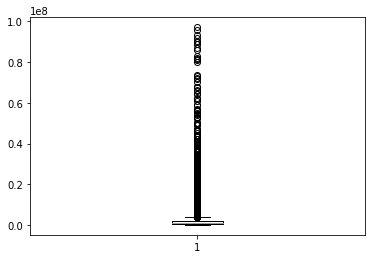

In [11]:
fig, ax = plt.subplots()
ax.boxplot(df[(df["SALE_PRICE"]>10000) & (df["SALE_PRICE"]<1.0e+08)]["SALE_PRICE"])

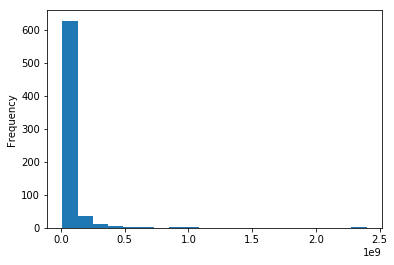

In [12]:
df[df["SALE_PRICE"]>10000000]["SALE_PRICE"].plot.hist(bins=20);


As I showed here, the histgram is super-right long tail.

So, I decided to take log to the data.


In [13]:
df["SALE_PRICE"].apply(np.log)

0       15.393418
1            -inf
2       15.623799
3            -inf
4            -inf
5            -inf
6       16.454568
7       13.679118
8       15.931766
9            -inf
10      16.152497
11      12.869763
12      15.424948
13           -inf
14      15.648092
15      14.690979
16           -inf
17           -inf
18           -inf
19           -inf
20      16.663323
21       9.876887
22       7.824046
23       7.824046
24       7.824046
25       7.824046
26       7.824046
27       7.824046
28       7.824046
29       7.824046
          ...    
7668    11.608236
7669    12.421184
7670    11.918391
7671    12.468437
7672    11.561716
7673    11.842229
7674    11.686879
7675    11.813030
7676    11.686879
7677    11.289782
7678    12.149502
7679    11.918391
7680    11.794338
7681    11.385092
7682    11.938193
7683    12.416188
7684    12.321969
7685    12.095141
7686    12.015372
7687    12.043554
7688         -inf
7689    11.338572
7690    12.091671
7691     9.581904
7692    11

In [14]:
df["SALE_PRICE"] = df["SALE_PRICE"].replace(0, np.NaN)
df["Logged_SALE_PRICE"] = df["SALE_PRICE"].apply(np.log)

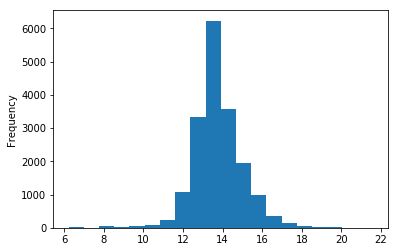

In [29]:
df[df["Logged_SALE_PRICE"]>6]["Logged_SALE_PRICE"].plot.hist(bins=20);


Then re-run the regression.

In [30]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['Logged_SALE_PRICE']>6]
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET','Logged_SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def model_score(model):
    model=model
    model.fit(X_train, Y_train)
    score=model.score(X_test, Y_test)
    return score



In [31]:
model=RandomForestRegressor()

print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'Logged_SALE_PRICE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.5225038421682265
AVG_AUC: 0.5782931605876358


In [32]:
model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'Logged_SALE_PRICE']
LinearRegression:0.2972071288958694
AVG_AUC: 0.31182291180739247


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [20]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % accuracy_score(model.predict(X_test), Y_test) )

from sklearn.model_selection import KFold
def plot_fitting_curve(datasets, maxdepth=15):
    # Intialize accuracies
    accuracies = {}
    for key in datasets:
        accuracies[key] = []
    # Initialize depths
    depths = range(1, maxdepth+1)
    # Fit model for each specific depth
    for md in depths:
        model = DecisionTreeClassifier(max_depth=md, random_state=42)
        # Record accuracies
        for key in datasets:
            X = datasets[key]['X']
            Y = datasets[key]['Y']
            if key == "X-Val":
                from sklearn.model_selection import cross_val_score
                kf = KFold(n_splits=5)
                accuracies[key].append(cross_val_score(model, X, Y, scoring="accuracy", cv=kf).mean())
            else:
                model.fit(datasets['Train']['X'], datasets['Train']['Y'])
                accuracies[key].append(accuracy_score(model.predict(X), Y))
    # Plot each curve
    plt.figure(figsize=[10,7])
    for key in datasets:
        plt.plot(depths, accuracies[key], label=key)
    # Plot details
    plt.title("Performance on train and test data")
    plt.xlabel("Max depth")
    plt.ylabel("Accuracy")
    # Find minimum accuracy in all runs
    max_acc = np.array(list(accuracies.values())).max()
    min_acc = np.array(list(accuracies.values())).min()
    plt.ylim([min_acc*0.99, max_acc*1.01])
    #plt.ylim([min_acc, 1.0])
    plt.xlim([1, maxdepth])
    plt.legend()
    plt.grid()
    plt.show()
    return accuracies

datasets = {"Train": {"X": X_train, "Y": Y_train}, "Test": {"X": X_test, "Y": Y_test}}
ac = plot_fitting_curve(datasets)

ValueError: Unknown label type: 'continuous'